# BFS and DFS

- BFS and DFS systematically compute reachability in graphs
- BFS works level by level
  - Discovers shortest paths in terms of number of edges
- DFS explores a vertex as soon as it is visited neighbours
  - Suspend a vertex while exploring its neighbours
  - DFS numbering describes the order in which vertices are explored


# Connectivity

- An undirected graph is connected if every vertex is reachable from every other vertex
- In a disconnected graph, we can identify the connected components
  - Maximal subsets of vertices that are connected
  - Isolated vertices are trivial components


# Identifying connected components

- assign each vertex a component number
- Start BFS/DFS from vertex 0
  - Initialize component number to 0
  - All visited nodes from a connected component
  - Assign each visited node component number 0
- Pick smallest unvisited node j
  - Increment component number to 1
  - Run BFS/DFS from node j
  - Assign each visited node component number 1
- Repeat until all nodes are visited


In [1]:
class Queue:
    def __init__(self):
        self.queue=[]
    def addq(self,v):
        self.queue.append(v)
    def delete(self):
        v= None
        if not self.isempty():
            v=self.queue[0]
            self.queue=self.queue[1:]
        return v
    def isempty(self):
        return (self.queue==[])
    def __str__(self):
        return (str(self.queue))

In [2]:
def BFSList(AList,v):
    (visited)=({})
    for i in AList.keys():
        visited[i]=False
    q=Queue()
    while not q.isempty():
        j=q.delete()
        for k in (AList[j]):
            if not visited[k]:
                visited[k]=True
                q.addq(k)
    return visited
                

In [3]:
def Compnents(AList):
    component={}
    for i in AList.keys():
        component[i]=-1
    (compids,seen)=(0,0)
    while seen<=max(AList.keys()):
        startv=min([i for i in AList.keys() if component[i]==-1])
        visited= BFSList(AList,startv)
        for i in visited.keys():
            seen=seen+1
            component[i]=compid
        compid=compid+1
    return (component)

# Detecting cycles

- A cycle is a path that starts and ends at the same vertex
  - Cycle may repeat a vertex
  - Cycle should no trepeat edges
  - Simple Cycle: only repeated vertices are start and end
- A graph is acyclic if it has no cycles

## BFS tree

- Edges explored by BFS from a tree
  - Technically, one tree per component
  - Collection of trees is a forest
- Any non-tree edge creates a cycle
  - detects cycles by searchingfor non-tree edges

## DFS Tree

- Maintain a DFS counter, iniially 0
- Increment counter each time we start and finish exploring a node
- Each vertex is assigned an entry number(pre) and exit number(post)
  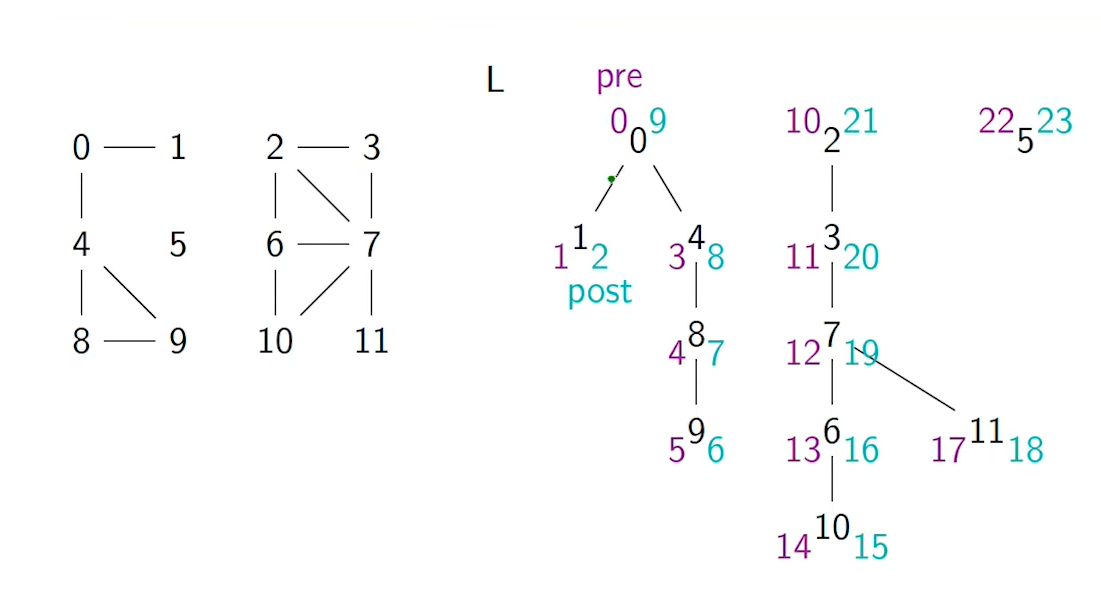

- As before, non tree edges generate cycles
- To compute pre and post pass counter via recursive DFS calls


In [4]:
(visited,pre,post)=({},{},{})
def DFSInitPrePost(AList):
    # Initialization
    for i in AList.keys():
        visited[i]=False
        pre[i],post[i]=-1,-1
    return
def DFSPrePost(Alist,v,count):
    visited[v]=True
    pre[v]=count
    count=count+1
    for k in Alist[v]:
        if (not visited[k]):
            count=DFSPrePost(Alist,k,count)
    post[v]=count
    count+=1
    return(count)        

# Directed Cycles

- In a directed graph, a cycle must follow same direction
- Tree edges
- Different types of non-tree edges
  - Forward edges
  - Backward edges
  - Cross edges
    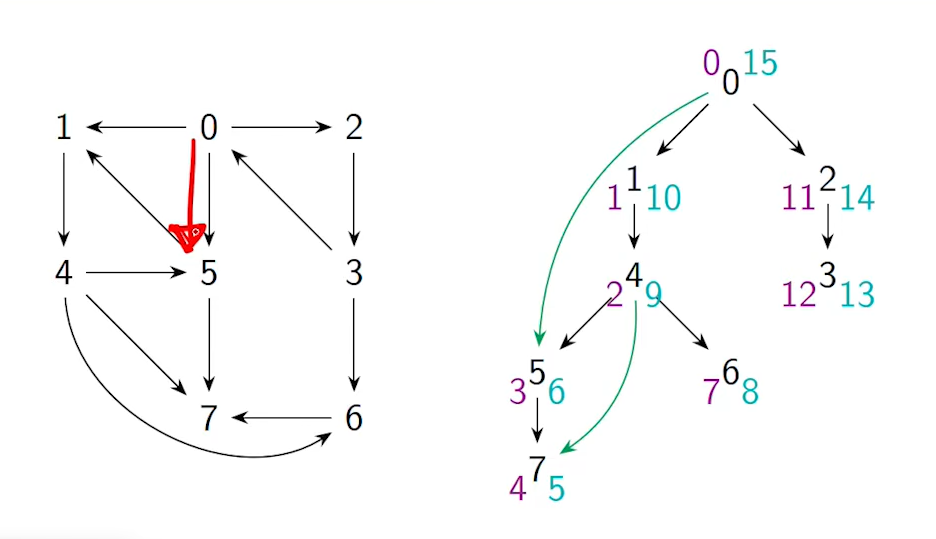

# Classifying non-tree edges in directed graphs

- Use pre/post numbers
- Tree edge /forward edge(u,v)
  - Internal [pre(u),post(u)] contains [pre(v),post(v)]
- Back edge(u,v)
  - Internal [pre(v),post(v)] contains [pre(u),post(u)]
- Cross edge (u,v)
  - Intervals [pre(u),post(u)] and [pre(v),post(v)] are disjoint

# Connectivity in directed graphs

- Take directions into account
- Vertices i and j are strongly connected if there is a path from i to j and a path from j to i
- Directed graphs can be decomposed into strongly connected components(SCCs)
  - Within an SCC, each pair of vertices is strongly connected
- DFS number can be used to compute SCCs
